<a href="https://colab.research.google.com/github/b4lbs/alura_ML_classificacao_sklearn/blob/main/Introdu%C3%A7%C3%A3o_a_Machine_Learning_e_Classifica%C3%A7%C3%A3o_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [ ]:
a_renomear = {
    "expected_hours" : "horas_esperadas",
    "price" : "preco",
    "unfinished" : "nao_finalizado"
}
dados = dados.rename(columns = a_renomear)
dados

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170
...,...,...,...
2152,0,80,7518
2153,1,52,1332
2154,0,40,473
2155,0,75,5324


In [ ]:
troca = {
    0 : 1,
    1 : 0
}
dados["finalizado"] = dados.nao_finalizado.map(troca)
dados.tail()

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


<Axes: xlabel='horas_esperadas', ylabel='preco'>

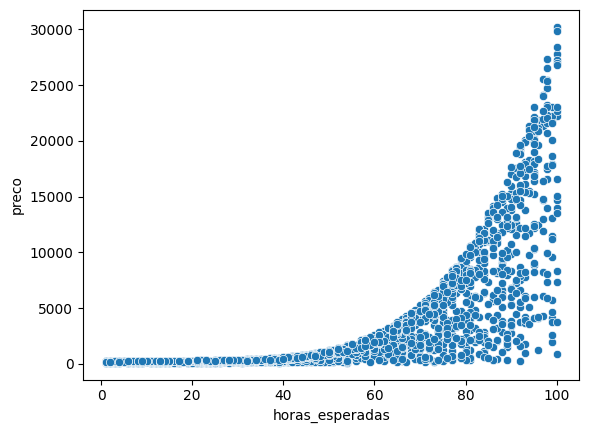

In [ ]:
import seaborn as sns

sns.scatterplot(x="horas_esperadas", y="preco", data=dados)

<Axes: xlabel='horas_esperadas', ylabel='preco'>

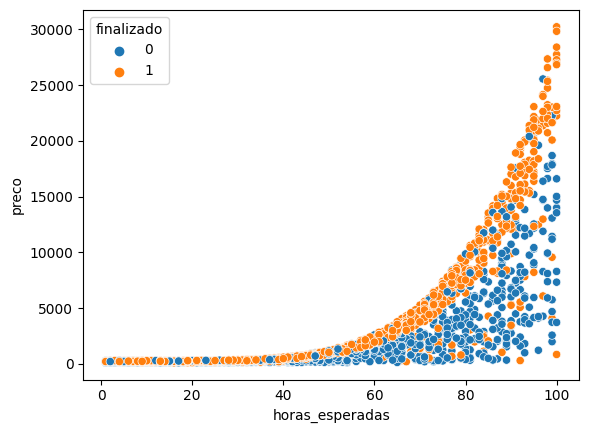

In [ ]:
sns.scatterplot(x="horas_esperadas", y="preco", hue="finalizado", data=dados)

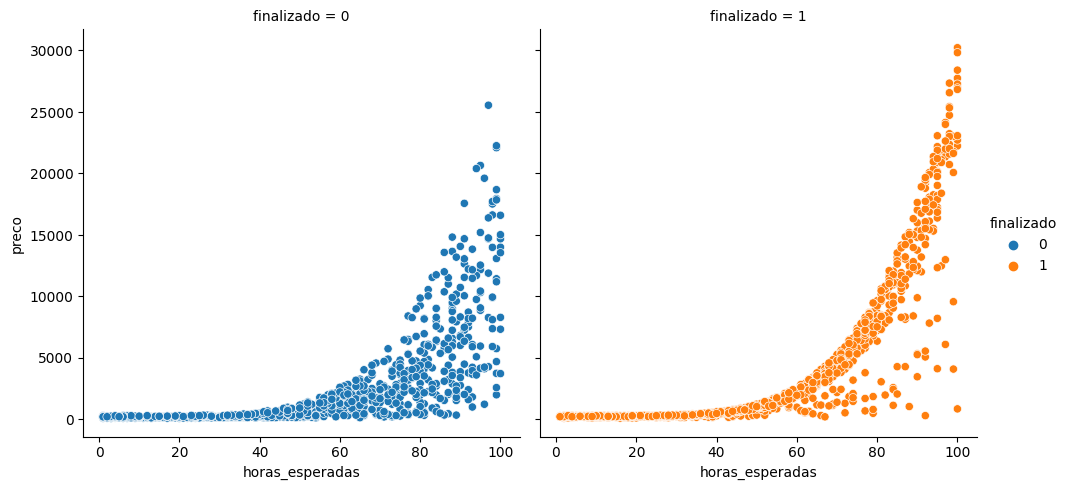

In [ ]:
sns.relplot(x="horas_esperadas", y="preco", hue="finalizado", col="finalizado", data=dados)

In [ ]:
X = dados[["horas_esperadas", "preco"]]
y = dados["finalizado"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 42

train_X , test_X, train_y, test_y = train_test_split(X, y,
                                                     random_state = SEED,
                                                     test_size = 0.25,
                                                     stratify = y)

print(f"Treinaremos com {len(train_X)} elementos e testaremos com {len(test_X)} elementos.")

model = LinearSVC()
model.fit(train_X, train_y)
previsoes = model.predict(test_X)

acuracia = accuracy_score(test_y, previsoes) * 100
print(f'A acurácia foi {acuracia:.2f}')

Treinaremos com 1617 elementos e testaremos com 540 elementos.
A acurácia foi 55.19


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
import numpy as np
previsoes_de_base = np.ones(540)
acuracia = accuracy_score(test_y, previsoes_de_base) * 100
print(f'A acurácia do algoritimo de baseline foi {acuracia:.2f}')

A acurácia do algoritimo de baseline foi 52.59


<Axes: xlabel='horas_esperadas', ylabel='preco'>

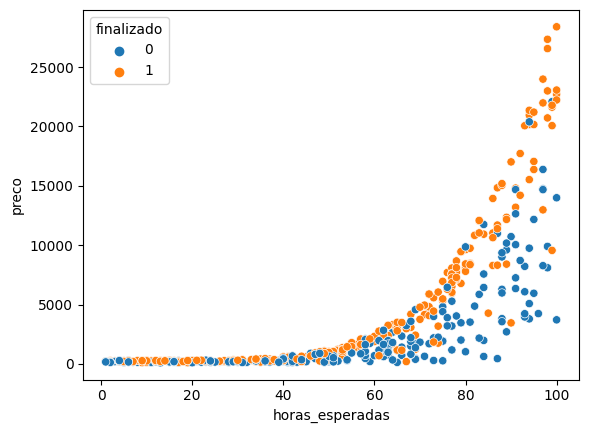

In [ ]:
sns.scatterplot(x="horas_esperadas", y="preco", hue=test_y, data=test_X)


In [ ]:
X_min = test_X.horas_esperadas.min()
X_max = test_X.horas_esperadas.max()
y_min = test_X.preco.min()
y_max = test_X.preco.max()
print(X_min, X_max, y_min, y_max)

1 100 100 28398


In [ ]:
pixels = 100
eixo_X = np.arange(X_min, X_max , (X_max - X_min) / pixels)
eixo_y = np.arange(y_min, y_max , (y_max - y_min) / pixels)

In [ ]:
XX, yy = np.meshgrid(eixo_X, eixo_y)
pontos = np.c_[XX.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.811502e+04],
       [9.802000e+01, 2.811502e+04],
       [9.901000e+01, 2.811502e+04]])

In [ ]:
Z = model.predict(pontos)
Z = Z.reshape(XX.shape)
Z

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

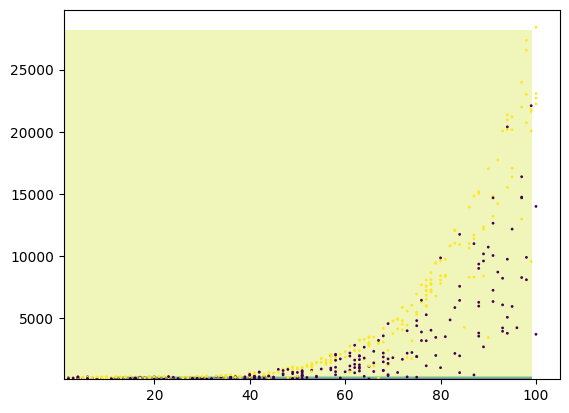

In [ ]:
import matplotlib.pyplot as plt
plt.contourf(XX, yy, Z, alpha=0.3)
plt.scatter(test_X.horas_esperadas, test_X.preco, c=test_y, s=1)

# DECISION BOUNDARY

In [ ]:
from sklearn.svm import SVC

SEED = 42
np.random.seed(SEED)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.25,
                                                         stratify = y)
print(f"Treinaremos com {len(train_X)} elementos e testaremos com {len(test_X)} elementos.")

modelo = SVC(gamma="auto")
modelo.fit(train_X, train_y)
previsoes = modelo.predict(test_X)

acuracia = accuracy_score(test_y, previsoes) * 100
print(f'A acurácia foi {acuracia:.2f}')

Treinaremos com 1617 elementos e testaremos com 540 elementos.
A acurácia foi 57.59


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


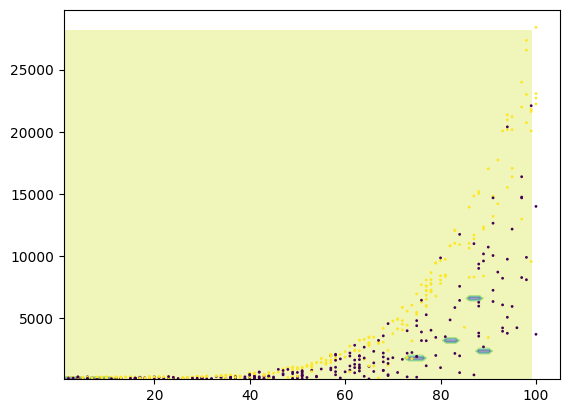

In [ ]:
x_min = test_X.horas_esperadas.min()
x_max = test_X.horas_esperadas.max()
y_min = test_X.preco.min()
y_max = test_X.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(test_X.horas_esperadas, test_X.preco, c=test_y, s=1)

# DECISION BOUNDARY

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 42
np.random.seed(SEED)
raw_train_X, raw_test_X, raw_train_y, raw_test_y = train_test_split(X, y,
                                                                    test_size = 0.25,
                                                                    stratify = y)
print(f"Treinaremos com {len(train_X)} elementos e testaremos com {len(test_X)} elementos.")

scaler = StandardScaler()
scaler.fit(raw_train_X)
train_X = scaler.transform(raw_train_X)
test_X = scaler.transform(raw_test_X)

model = SVC(gamma="auto")
model.fit(train_X, train_y)
previsoes = model.predict(test_X)

acuracia = accuracy_score(test_y, previsoes) *100
print(f'A acurácia foi {acuracia:.2f}')

Treinaremos com 1617 elementos e testaremos com 540 elementos.
A acurácia foi 67.78


In [ ]:
train_X

array([[-1.16287145, -0.5688401 ],
       [-0.28786069, -0.5062751 ],
       [-0.42786241, -0.54952743],
       ...,
       [-0.5328637 , -0.53946875],
       [-0.14785896, -0.45698757],
       [ 1.21715784,  0.86492423]])

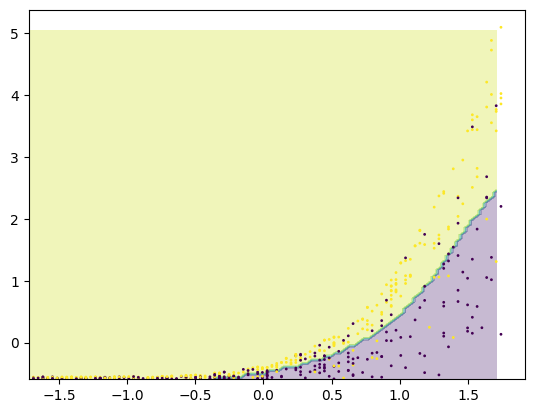

In [ ]:
data_X = test_X[:,0]
data_y = test_X[:,1]

X_min = data_X.min()
X_max = data_X.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_X = np.arange(X_min, X_max, (X_max - X_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

XX, yy = np.meshgrid(eixo_X, eixo_y)
pontos = np.c_[XX.ravel(), yy.ravel()]

Z = model.predict(pontos)
Z = Z.reshape(XX.shape)

plt.contourf(XX, yy, Z, alpha=0.3)
plt.scatter(data_X, data_y, c=test_y, s=1)